In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
%cd "C:\EPGP\Machin Learning 2\Advanced Regression"

C:\EPGP\Machin Learning 2\Advanced Regression


In [3]:
# housing_data = pd.read_csv("train.csv")
housing_data = pd.read_csv("train.csv", na_values="NaN")

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [5]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
housing_data.shape

(1460, 81)

In [8]:
housing_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [9]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
housing_data['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [12]:
housing_data['HouseStyle'].astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [13]:
housing_data['HouseStyle'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: HouseStyle
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [14]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
housing_data = housing_data.drop("Id", axis=True)

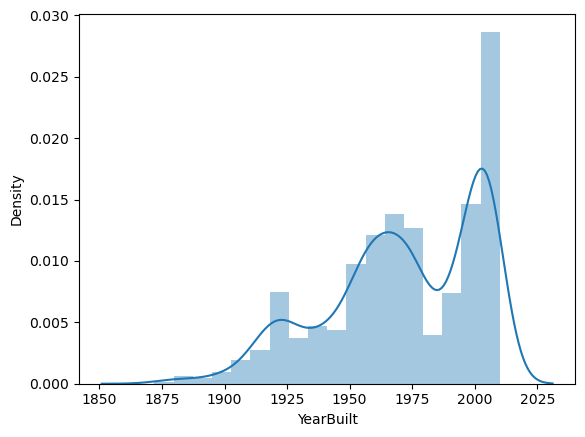

In [16]:
sns.distplot(housing_data['YearBuilt'])
plt.show()

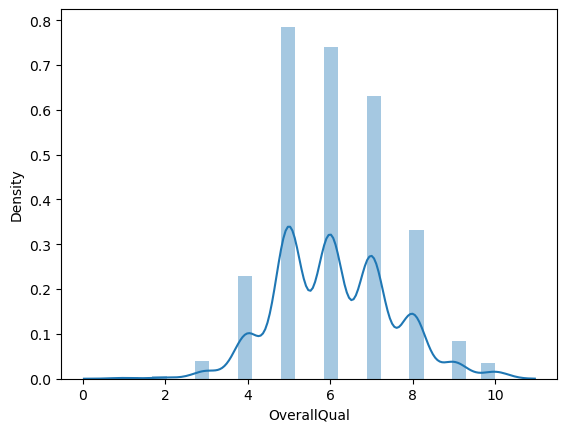

In [17]:
sns.distplot(housing_data['OverallQual'])
plt.show()

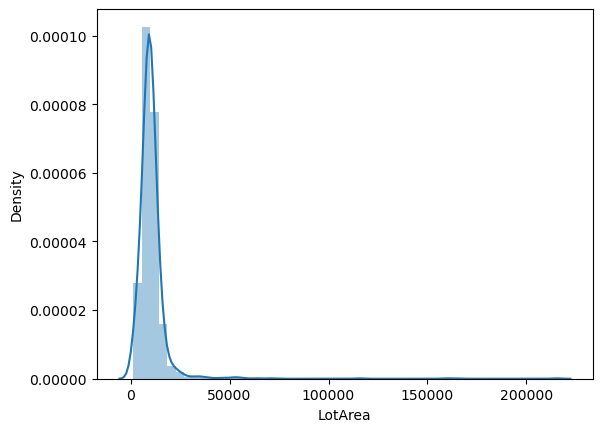

In [18]:
sns.distplot(housing_data['LotArea'])
plt.show()

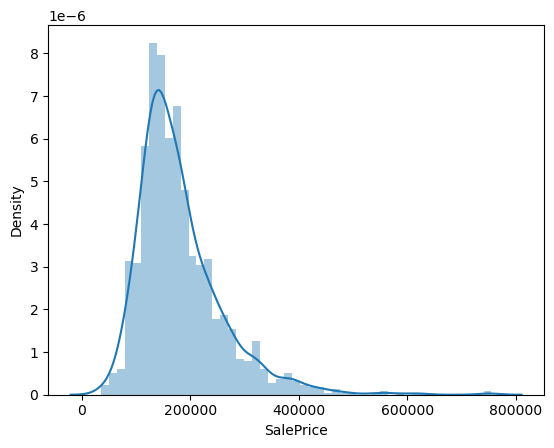

In [19]:
sns.distplot(housing_data['SalePrice'])
plt.show()

In [20]:
housing_data['SalePrice'].skew()

1.8828757597682129

In [21]:
housing_data['SalePrice'].kurt()

6.536281860064529

In [22]:
housing_data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
MSSubClass          0
Fireplaces          0
Functional          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
CentralAir

In [23]:
housing_data["YearBuilt"].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1998    25
1999    25
1965    24
2000    24
1970    24
1954    24
1958    24
2008    23
2002    23
1972    23
1971    22
1968    22
1950    20
1957    20
2001    20
1994    19
1962    19
1940    18
1966    18
2009    18
1995    18
1910    17
1993    17
1960    17
1963    16
1978    16
1925    16
1955    16
1967    16
1996    15
1941    15
1964    15
1961    14
1948    14
1956    14
1969    14
1997    14
1992    13
1953    12
1990    12
1949    12
1973    11
1988    11
1900    10
1974    10
1915    10
1980    10
1984     9
1926     9
1936     9
1979     9
1930     9
1922     8
1975     8
1939     8
1916     8
1928     7
1914     7
1923     7
1924     7
1918     7
1946     7
1935     6
1951     6
1921     6
1945     6
1982     6
1931     6
1986     5
1937     5
1981     5
1991     5
1947     5
1952     5
1985     5
1929     4
1938     4
1983     4
1932     4
1880     4
1919     3
1989     3

<AxesSubplot:xlabel='SalePrice'>

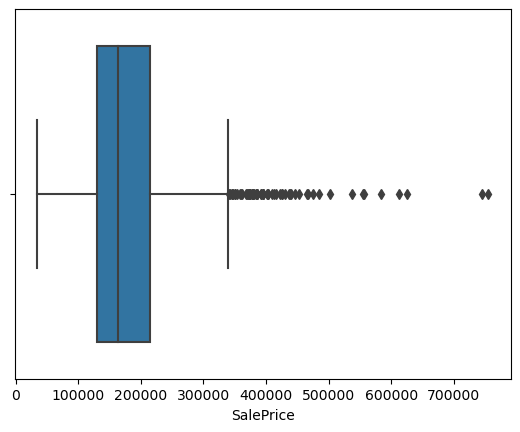

In [24]:
sns.boxplot(housing_data["SalePrice"])

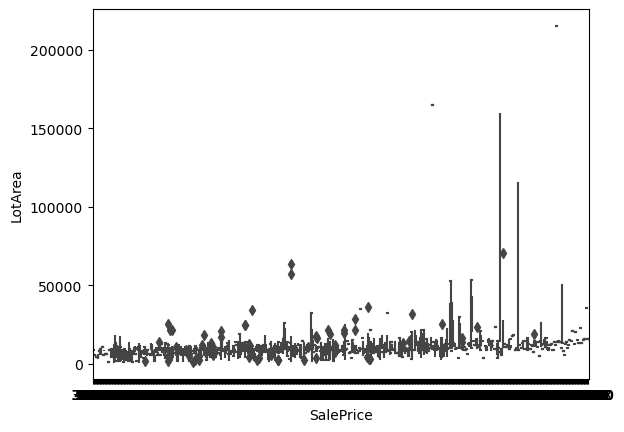

In [25]:
sns.boxplot(housing_data["SalePrice"], housing_data["LotArea"])
plt.show()

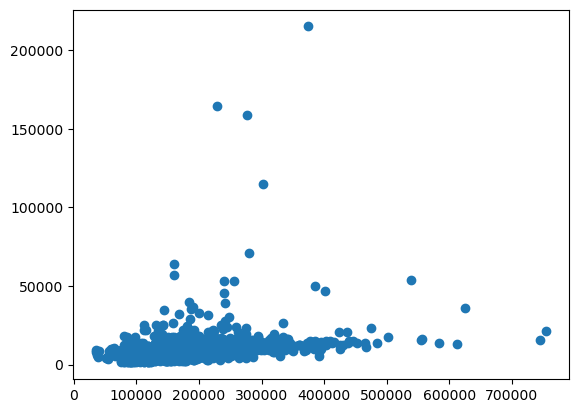

In [26]:
plt.scatter(housing_data["SalePrice"], housing_data["LotArea"])
plt.show()

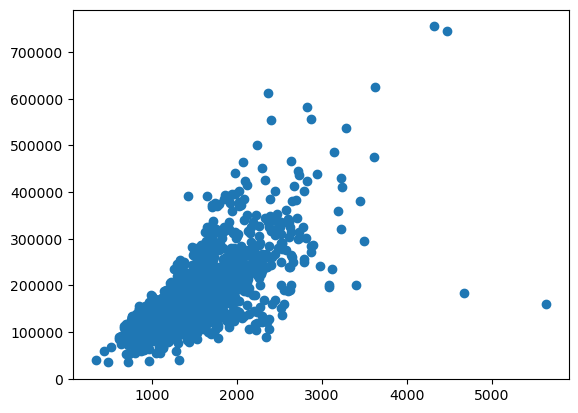

In [27]:
plt.scatter(housing_data["GrLivArea"], housing_data["SalePrice"])
plt.show()

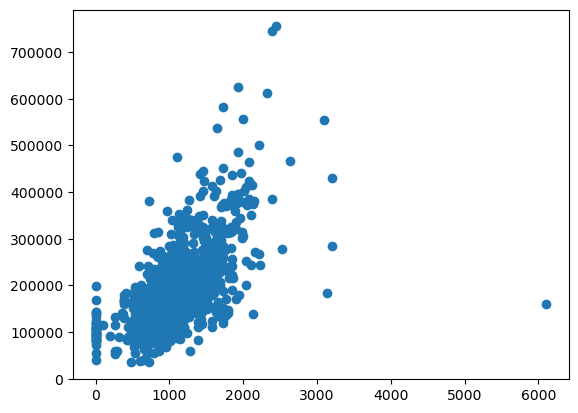

In [28]:
plt.scatter(housing_data["TotalBsmtSF"], housing_data["SalePrice"])
plt.show()

<AxesSubplot:>

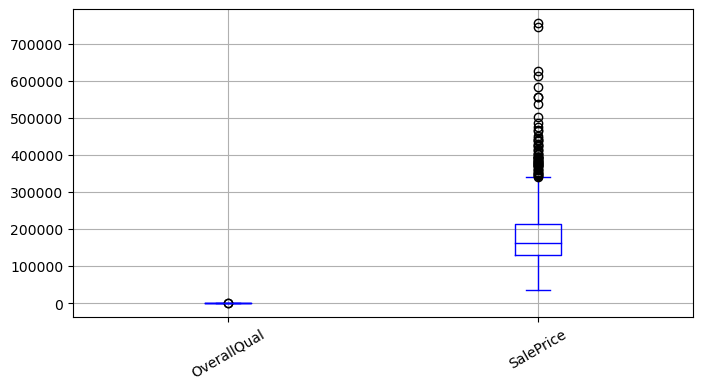

In [29]:
plt.rcParams['figure.figsize'] = (8,4)
housing_data.boxplot(column=['OverallQual', 'SalePrice'], grid='true', color='blue',fontsize=10, rot=30)

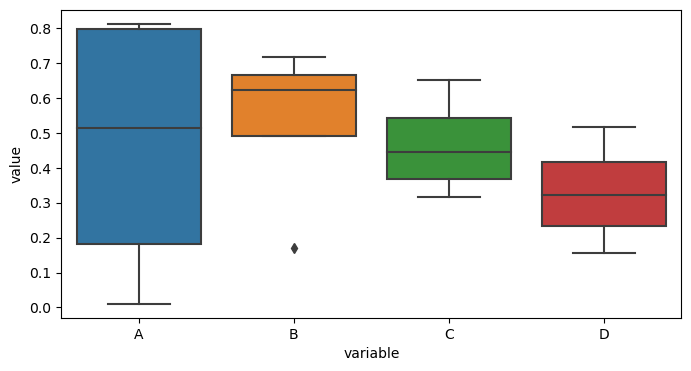

In [30]:
df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['A','B','C','D'])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [31]:
housing_data["OverallQual"].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

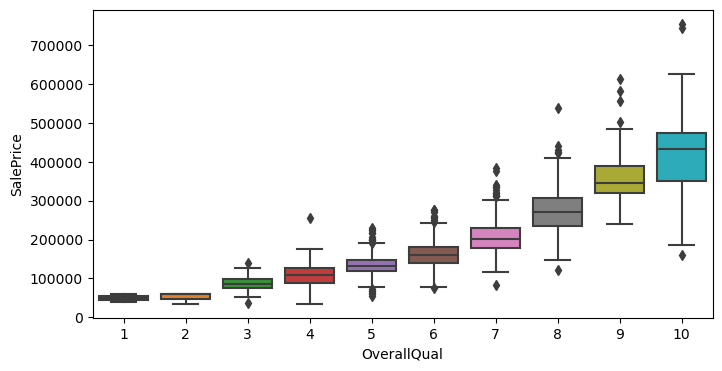

In [32]:
c = [1,2,3,4,5,6,7,8,9,10]
housing_data_boxplot= housing_data[housing_data["OverallQual"].isin(c)]
sns.boxplot(housing_data_boxplot['OverallQual'], housing_data["SalePrice"])
plt.show()

In [33]:
housing_data["Street"].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

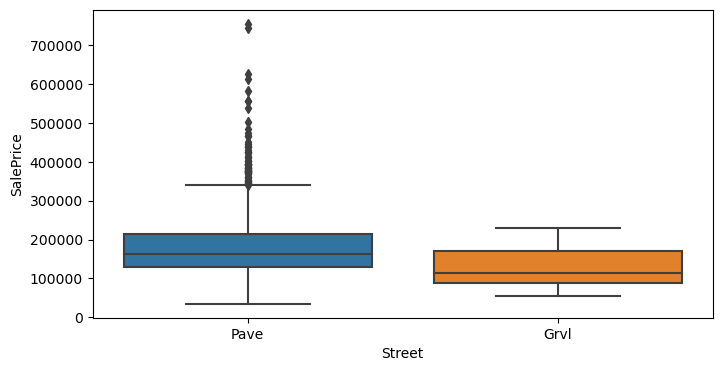

In [34]:
d = ['Pave', 'Grvl']
housing_data_boxplot_street= housing_data[housing_data["Street"].isin(d)]
sns.boxplot(housing_data_boxplot_street['Street'], housing_data["SalePrice"])
plt.show()

In [35]:
housing_data["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

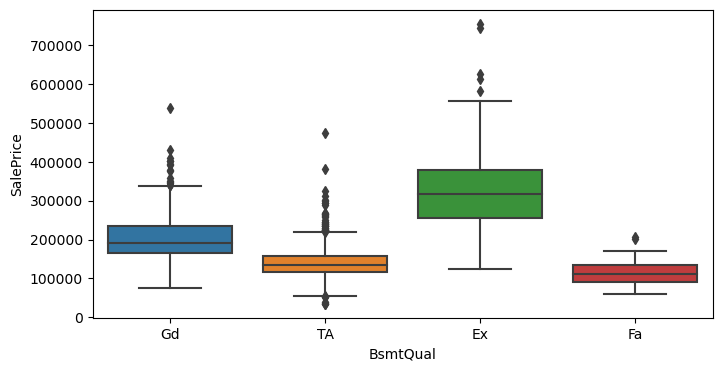

In [36]:
e = ["TA", "Gd", "Ex", "Fa"]
housing_data_boxplot_bsmt= housing_data[housing_data["BsmtQual"].isin(e)]
sns.boxplot(housing_data_boxplot_bsmt['BsmtQual'], housing_data["SalePrice"])
plt.show()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

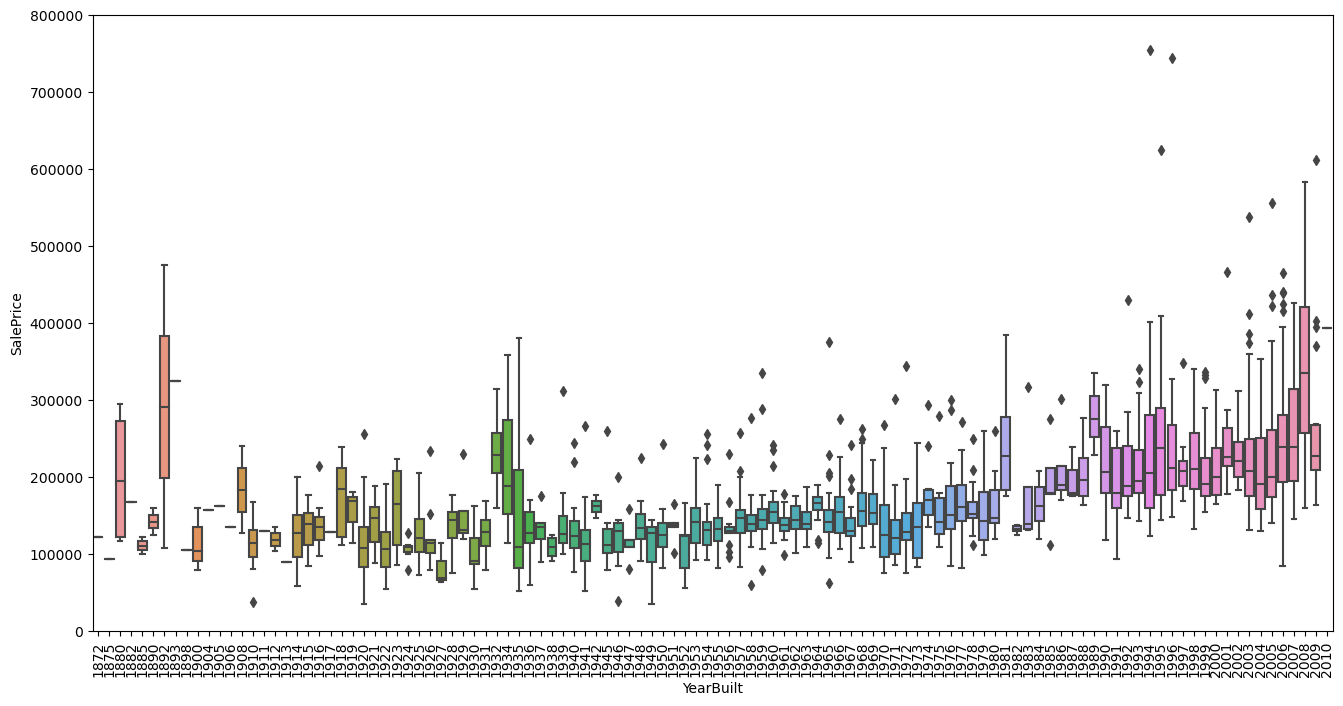

In [37]:
data = pd.concat([housing_data["SalePrice"], housing_data["YearBuilt"]], axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

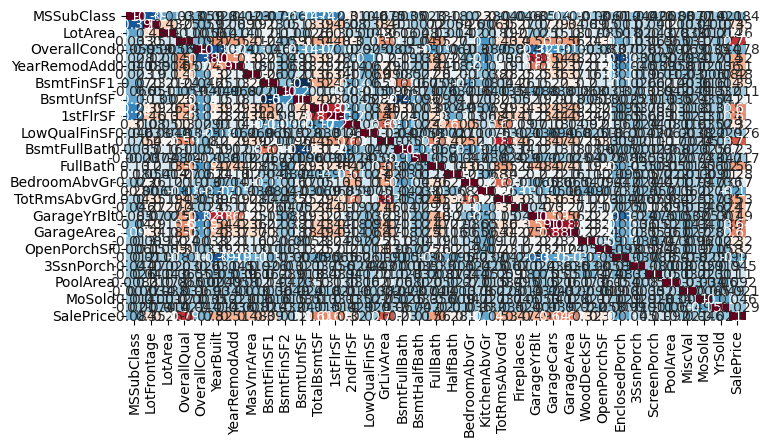

In [38]:
sns.heatmap(housing_data.corr(),cmap='RdBu_r', cbar=False,annot=True)
plt.show()

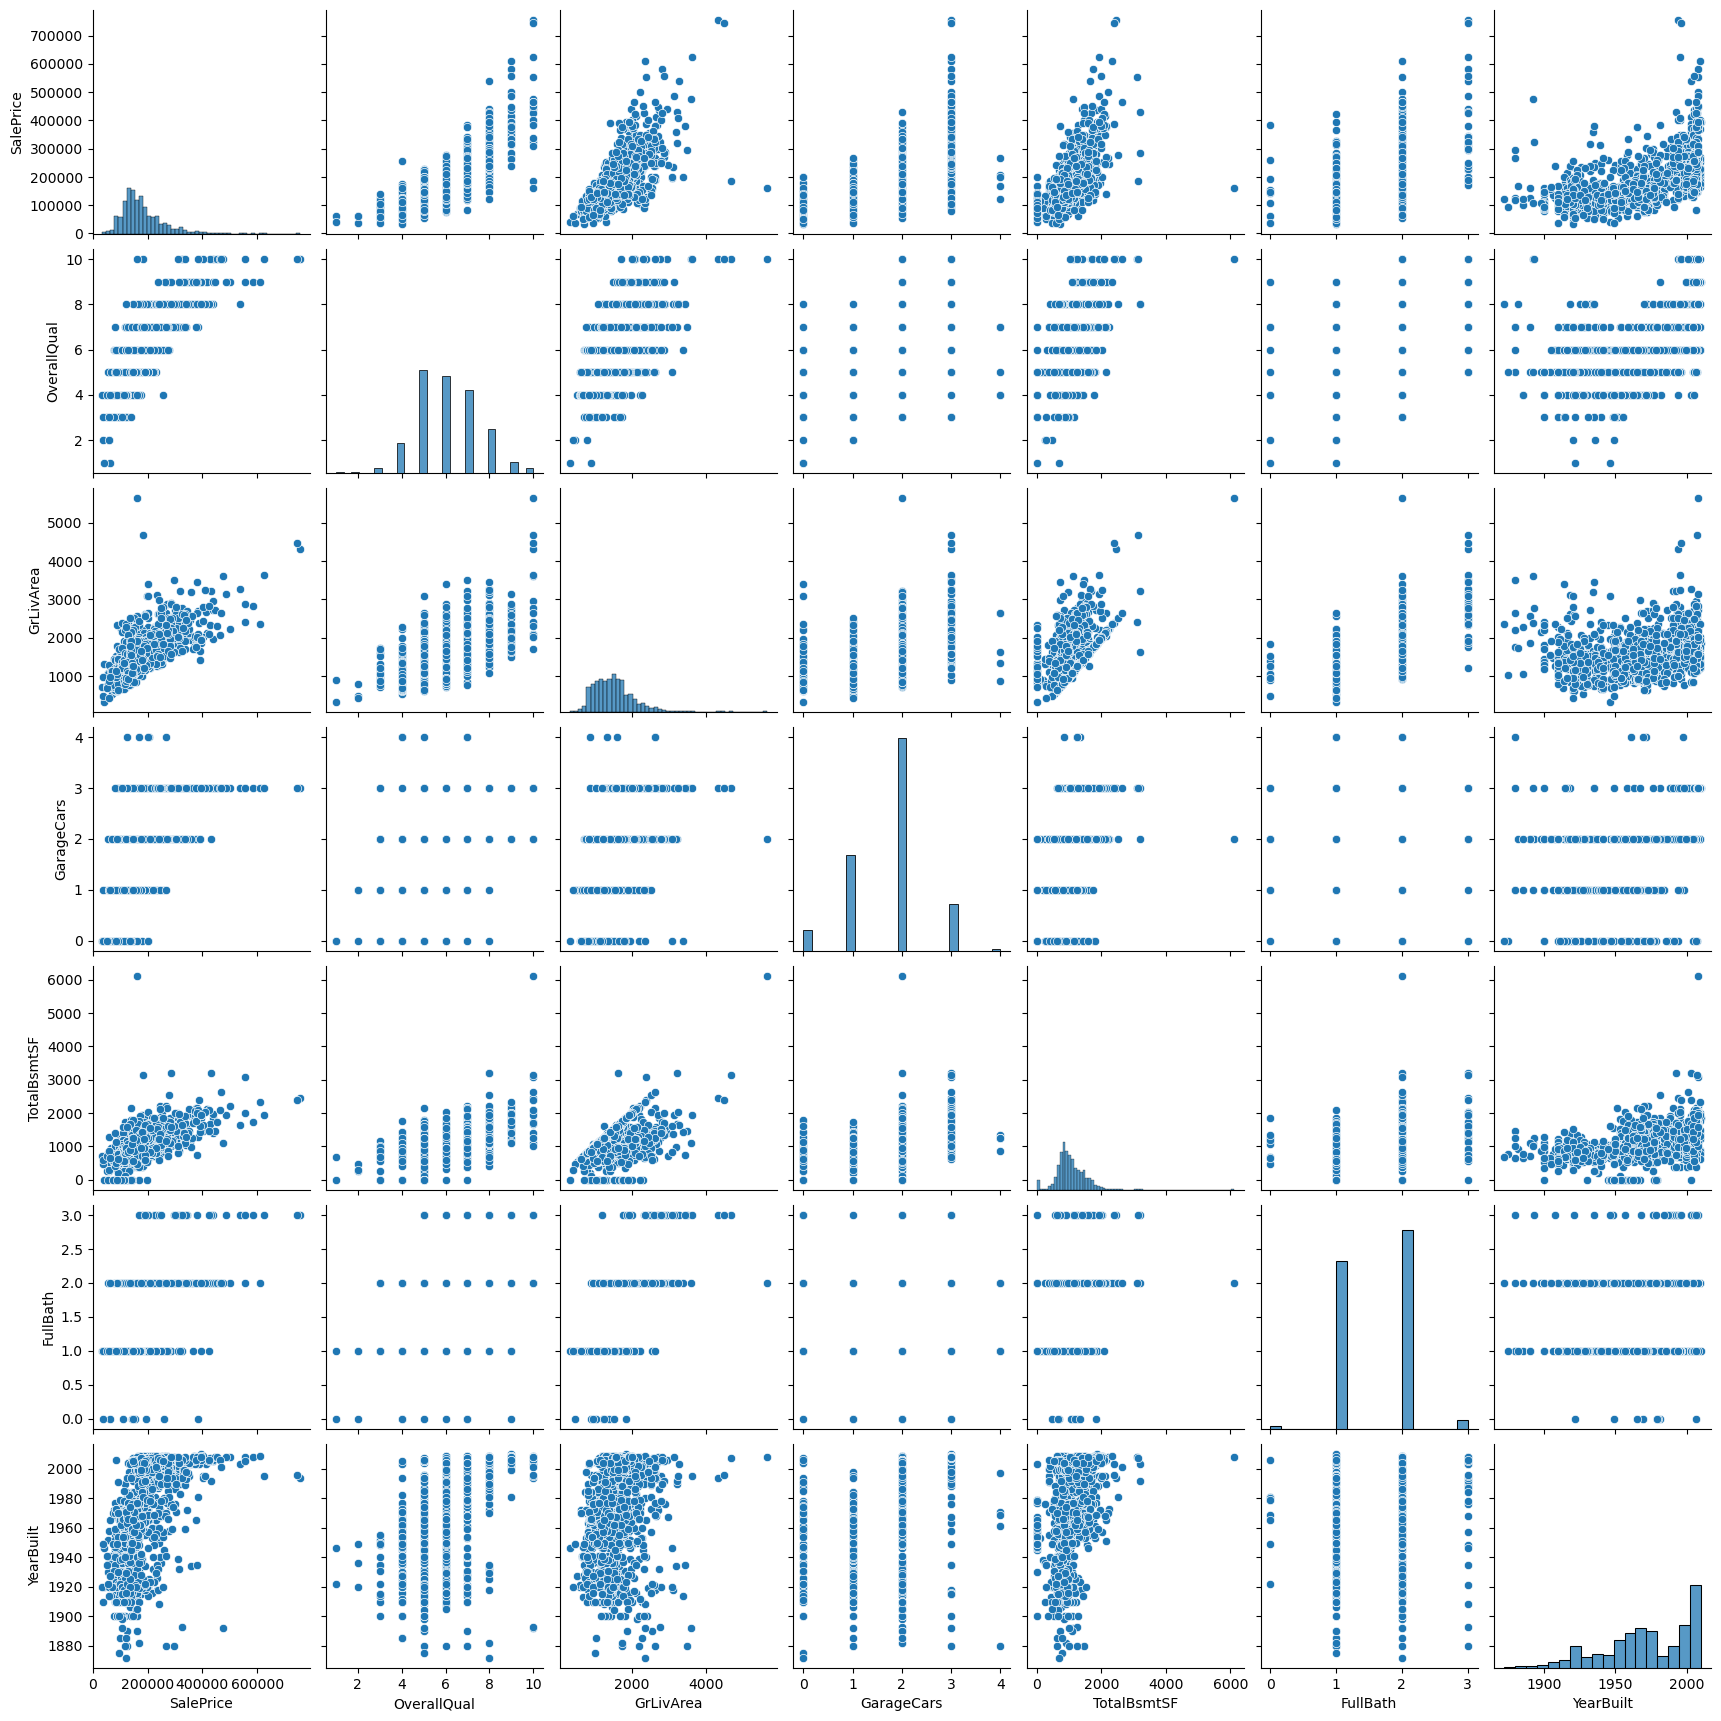

In [39]:
pplot = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]
sns.pairplot(housing_data[pplot], size=2.5)
plt.show()

In [40]:
housing_data.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


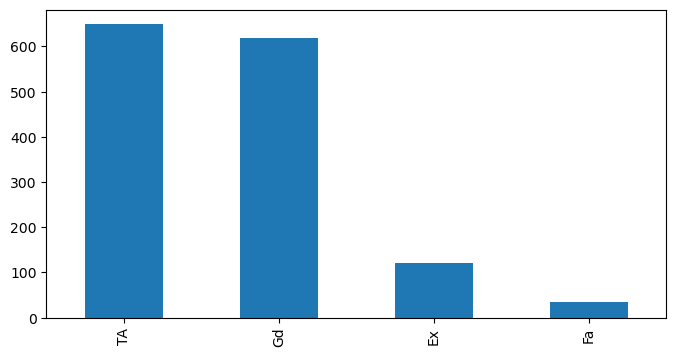

In [41]:
housing_data['BsmtQual'].value_counts().plot.bar()
plt.show()

Text(0.5, 1.0, 'House Price vs YearBuilt')

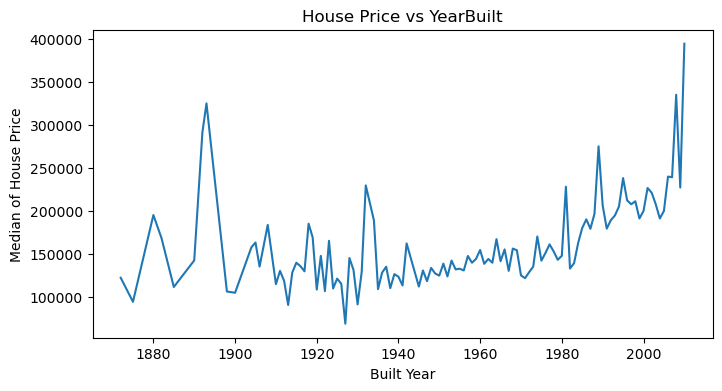

In [42]:
housing_data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel('Built Year')
plt.ylabel('Median of House Price')
plt.title("House Price vs YearBuilt")

In [43]:
round(housing_data.isnull().sum()/len(housing_data)*100, 2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [44]:
column_has_null = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in column_has_null:
    housing_data[col].fillna("Not Available", inplace=True)

In [45]:
round(housing_data.isnull().sum()/len(housing_data)*100, 2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [46]:
housing_data["LotFrontage"].fillna(housing_data["LotFrontage"].median(), inplace=True)
housing_data["GarageYrBlt"].fillna(housing_data["GarageYrBlt"].median(), inplace=True)
housing_data["MasVnrArea"].fillna(housing_data["MasVnrArea"].median(), inplace=True)

In [47]:
housing_data["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [48]:
housing_data["MasVnrType"].fillna("Not Available", inplace=True)
housing_data["Electrical"].fillna("Not Available", inplace=True)

In [49]:
round(housing_data.isnull().sum()/len(housing_data)*100, 2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

### Seggregate feature as per their type

In [50]:
feature_types = housing_data.dtypes
num_feature = feature_types[(feature_types == 'int64') | (feature_types == float)]
cat_feature = feature_types[feature_types == object]

In [51]:
num_feature_list = list(num_feature.index)
num_feature_list

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

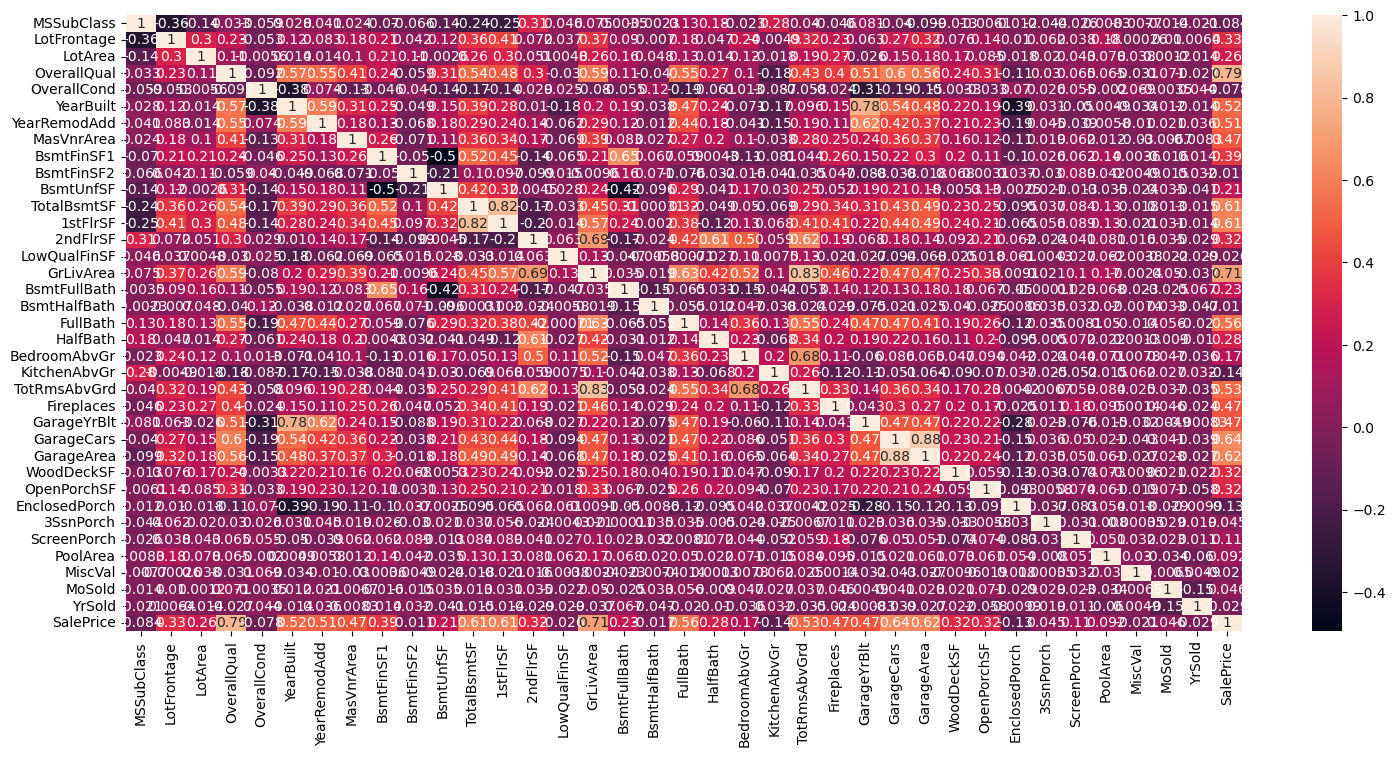

In [52]:
corr = housing_data[num_feature_list].corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True)
plt.show()

In [53]:
housing_data[num_feature_list].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [54]:
cat_feature_list = list(cat_feature.index)
cat_feature_list

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Data Preparation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

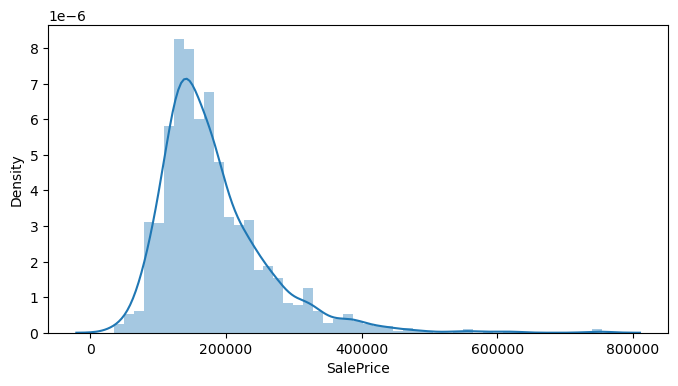

In [55]:
sns.distplot(housing_data["SalePrice"])

### Since sale price is right skewed so we have to do log transformation

In [56]:
housing_data["SalePrice"]=np.log(housing_data["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

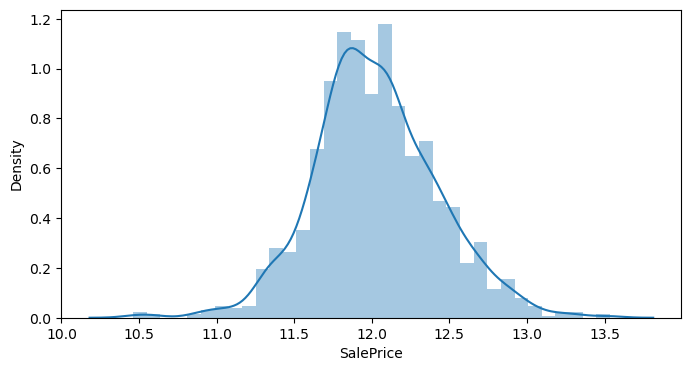

In [57]:
sns.distplot(housing_data["SalePrice"])

- Now we see normal distribution for Sales column

### Split dataset into Train and Test

In [58]:
for i in cat_feature_list:
    feature_set = set(housing_data[i])
    for j in feature_set:
        feature_list = list(feature_set)
        housing_data.loc[housing_data[i] == j, i] = feature_list.index(j)

#### dropping SalesPrice column

In [59]:
X = housing_data.drop(["SalePrice"],axis=1)
y = housing_data["SalePrice"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X , y, train_size=0.70, random_state=100)

In [61]:
print(X_train.shape)
print(y_train.shape)

(1021, 79)
(1021,)


In [62]:
y_train.head()

318     12.468437
239     11.635143
986     11.669929
1416    11.715866
390     11.686879
Name: SalePrice, dtype: float64

In [63]:
housing_data.shape

(1460, 80)

In [64]:
num_feature_list.remove("SalePrice")

### Scaling X_train and X_test datasets

In [65]:
scaler = MinMaxScaler()
model = scaler.fit(X_train[num_feature_list])
X_train[num_feature_list] = model.transform(X_train[num_feature_list])
X_test[num_feature_list] = scaler.fit_transform(X_test[num_feature_list])

### Building Simple Linear Model

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
print(lr.score(X_train,y_train))

0.8934347827702013


In [68]:
print(lr.score(X_test,y_test))

0.23626049407104588


- As we can see that test score is 0.90 and test score is -0.27. So it is overfitting model

### Let's create Lasso Regression Model

In [69]:
lr = Lasso(alpha=0.006)
lr.fit(X_train, y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.8135116255829659
Testing R2
0.7630301177187843


In [70]:
lr.coef_

array([-0.        ,  0.01131298,  0.        ,  0.        ,  0.        ,
        0.        ,  0.0179049 , -0.        ,  0.        , -0.01440248,
        0.        ,  0.00109035, -0.00790287, -0.        ,  0.02184938,
       -0.00464446,  0.6585554 ,  0.        ,  0.        ,  0.17113463,
       -0.        ,  0.        , -0.00792443,  0.00286342, -0.00298559,
        0.        ,  0.        ,  0.        , -0.01634666, -0.0008203 ,
        0.02934596, -0.001387  ,  0.02122813,  0.        ,  0.00198821,
        0.        ,  0.        ,  0.        ,  0.        , -0.01611545,
       -0.02406836,  0.00089747,  0.        ,  0.        ,  0.        ,
        0.25068483,  0.        ,  0.        ,  0.06501522,  0.        ,
        0.        , -0.        , -0.01799675,  0.20742171,  0.        ,
        0.        ,  0.03479319,  0.02065772,  0.        , -0.0232491 ,
        0.21442071,  0.        ,  0.02033632,  0.01094081, -0.01262236,
        0.        ,  0.        , -0.        ,  0.        ,  0.  

In [71]:
params = {"alpha": [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.01, 0.1, 1, 10, 100, 200, 300, 600, 700, 800, 1000]}
folds=5
lasso = Lasso()
model_lasso_cv=GridSearchCV(
    estimator=lasso,
    cv=folds,
    param_grid = params,
    scoring='r2',
    verbose=1,
    return_train_score=True)

model_lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.01, 0.1, 1, 10, 100, 200, 300, 600,
                                   700, 800, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [72]:
cv_lasso_result = pd.DataFrame(model_lasso_cv.cv_results_)
cv_lasso_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028213,0.008336,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.734452,0.691482,0.820434,0.893415,0.900840,0.808124,0.083732,6,0.909173,0.909796,0.903348,0.889563,0.886676,0.899711,0.009771
1,0.004029,0.006057,0.000000,0.000000,0.001,{'alpha': 0.001},0.869589,0.750068,0.821863,0.882790,0.884857,0.841833,0.051222,1,0.875320,0.900263,0.883925,0.871233,0.867112,0.879571,0.011747
2,0.006298,0.007713,0.000000,0.000000,0.002,{'alpha': 0.002},0.865516,0.772757,0.815485,0.869334,0.865825,0.837783,0.038148,2,0.863985,0.886717,0.873199,0.860255,0.855036,0.867839,0.011148
3,0.002311,0.002836,0.000202,0.000404,0.003,{'alpha': 0.003},0.857396,0.780999,0.811858,0.860128,0.846931,0.831462,0.030543,3,0.851273,0.871525,0.863896,0.850097,0.844106,0.856179,0.010019
4,0.006807,0.008379,0.003125,0.006250,0.004,{'alpha': 0.004},0.848058,0.778916,0.804909,0.848256,0.829207,0.821869,0.026715,4,0.839357,0.857549,0.851343,0.838024,0.832716,0.843798,0.009186


In [73]:
cv_lasso_result[["param_alpha", "mean_test_score", "mean_train_score"]]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,0.808124,0.899711
1,0.001,0.841833,0.879571
2,0.002,0.837783,0.867839
3,0.003,0.831462,0.856179
4,0.004,0.821869,0.843798
5,0.005,0.809792,0.830043
6,0.006,0.796805,0.815829
7,0.01,0.739716,0.758717
8,0.1,0.409259,0.421124
9,1,-0.006874,0.000000


In [74]:
model_lasso_cv.best_params_

{'alpha': 0.001}

#### So we can see here that when alpha value is 0.001 then model is performing good on test data

### Lets create Ridge Regression Model

In [75]:
params = {"alpha": [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.01, 0.1, 1, 10, 100, 200, 300, 600, 700, 800, 1000]}
folds=5
ridge = Ridge()
model_ridge_cv = GridSearchCV(
    estimator=ridge,
    cv=folds,
    param_grid = params,
    scoring='r2',
    verbose=1,
    return_train_score=True)

model_ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.01, 0.1, 1, 10, 100, 200, 300, 600,
                                   700, 800, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [76]:
cv_ridge_result = pd.DataFrame(model_ridge_cv.cv_results_)
cv_ridge_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003995,0.006283,0.003300,0.006599,0.0001,{'alpha': 0.0001},0.661164,0.676242,0.817878,0.893573,0.896521,0.789076,0.102359,11,0.910360,0.910089,0.904068,0.890186,0.887530,0.900447,0.009762
1,0.008061,0.000121,0.000000,0.000000,0.001,{'alpha': 0.001},0.664870,0.676298,0.817885,0.893544,0.896553,0.789830,0.101428,10,0.910358,0.910089,0.904068,0.890186,0.887529,0.900446,0.009762
2,0.004747,0.006116,0.001041,0.002083,0.002,{'alpha': 0.002},0.668873,0.676359,0.817893,0.893513,0.896588,0.790645,0.100437,9,0.910351,0.910089,0.904067,0.890185,0.887529,0.900444,0.009761
3,0.000000,0.000000,0.000000,0.000000,0.003,{'alpha': 0.003},0.672760,0.676421,0.817901,0.893481,0.896622,0.791437,0.099489,8,0.910339,0.910089,0.904066,0.890184,0.887528,0.900441,0.009759
4,0.006275,0.007686,0.000728,0.001222,0.004,{'alpha': 0.004},0.676535,0.676482,0.817908,0.893450,0.896656,0.792206,0.098583,7,0.910322,0.910089,0.904065,0.890183,0.887526,0.900437,0.009756


In [77]:
cv_ridge_result[["param_alpha", "mean_test_score", "mean_train_score"]]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,0.789076,0.900447
1,0.001,0.789830,0.900446
2,0.002,0.790645,0.900444
3,0.003,0.791437,0.900441
4,0.004,0.792206,0.900437
5,0.005,0.792954,0.900432
6,0.006,0.793680,0.900426
7,0.01,0.796393,0.900392
8,0.1,0.821329,0.898505
9,1,0.836897,0.890074


In [78]:
model_ridge_cv.best_params_

{'alpha': 1}

### lets plot mean test and mean train score with alpha

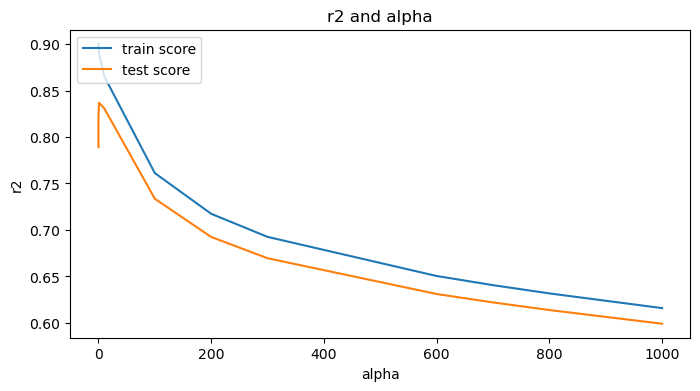

In [79]:
cv_ridge_result['param_alpha'] = cv_ridge_result['param_alpha'].astype('int32')
plt.plot(cv_ridge_result["param_alpha"],cv_ridge_result["mean_train_score"])
plt.plot(cv_ridge_result["param_alpha"],cv_ridge_result["mean_test_score"])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()
#we can see alpha =10 is optimum solution

#### So we can see that when best alpha value can 1 where models performs well in Ridge

### Lets now dropp most important columns then rebuild the model with Lasso and Ridge

In [80]:
X_train_new = X_train.drop(["OverallQual", "GrLivArea", "TotalBsmtSF","GarageCars", "FullBath"], axis=1)

In [81]:
X_test_new = X_test.drop(["OverallQual", "GrLivArea", "TotalBsmtSF","GarageCars", "FullBath"], axis=1)

### Lasso

In [82]:
params = {"alpha": [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.01, 0.1, 1, 10, 100, 200, 300, 600, 700, 800, 1000]}
folds = 5
lasso = Lasso()
model_lasso_cv_dropped = GridSearchCV(
    estimator=lasso,
    cv=folds,
    param_grid = params,
    scoring='r2',
    verbose=1,
    return_train_score=True)

model_lasso_cv_dropped.fit(X_train_new, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.01, 0.1, 1, 10, 100, 200, 300, 600,
                                   700, 800, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [83]:
cv_lasso_result_dropped = pd.DataFrame(model_ridge_cv.cv_results_)

In [84]:
cv_lasso_result_dropped[["param_alpha", "mean_test_score", "mean_train_score"]]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,0.789076,0.900447
1,0.001,0.789830,0.900446
2,0.002,0.790645,0.900444
3,0.003,0.791437,0.900441
4,0.004,0.792206,0.900437
5,0.005,0.792954,0.900432
6,0.006,0.793680,0.900426
7,0.01,0.796393,0.900392
8,0.1,0.821329,0.898505
9,1,0.836897,0.890074


In [85]:
model_lasso_cv_dropped.best_params_

{'alpha': 0.001}

### Ridge

In [86]:
params = {"alpha": [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.01, 0.1, 1, 10, 100, 200, 300, 600, 700, 800, 1000]}
folds = 5
ridge = Ridge()
model_ridge_cv_dropped = GridSearchCV(
    estimator=ridge,
    cv=folds,
    param_grid = params,
    scoring='r2',
    verbose=1,
    return_train_score=True)

model_ridge_cv_dropped.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.01, 0.1, 1, 10, 100, 200, 300, 600,
                                   700, 800, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [87]:
cv_ridge_result_dropped = pd.DataFrame(model_ridge_cv.cv_results_)

In [88]:
cv_ridge_result_dropped[["param_alpha", "mean_test_score", "mean_train_score"]]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,0.789076,0.900447
1,0.001,0.789830,0.900446
2,0.002,0.790645,0.900444
3,0.003,0.791437,0.900441
4,0.004,0.792206,0.900437
5,0.005,0.792954,0.900432
6,0.006,0.793680,0.900426
7,0.01,0.796393,0.900392
8,0.1,0.821329,0.898505
9,1,0.836897,0.890074


In [89]:
model_ridge_cv_dropped.best_params_

{'alpha': 1}

In [90]:
### Lets Double Alpha value anc check coeficients

In [91]:
lr = Lasso(alpha=0.002)
lr.fit(X_train, y_train)

Lasso(alpha=0.002)

In [92]:
lr.coef_

array([-7.15045548e-02,  4.51469154e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.09676832e-02,  1.12788420e-02, -1.18000629e-02,
        0.00000000e+00, -1.31444075e-02,  2.02993881e-02,  1.49533994e-04,
       -1.15563609e-02, -2.30918308e-02,  1.49791842e-02,  2.08700286e-03,
        7.45092990e-01,  4.89518446e-02,  5.55504591e-02,  1.44242813e-01,
        0.00000000e+00,  1.89433067e-02, -6.26592839e-03,  2.11220062e-03,
       -2.70132868e-03,  0.00000000e+00,  3.57002286e-03,  0.00000000e+00,
       -9.25033359e-03, -7.69516063e-03,  3.04069226e-02, -4.90856532e-03,
        1.50139317e-02,  0.00000000e+00,  4.68896113e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.04500437e-02,
       -6.35120454e-02,  4.54726277e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  8.02926379e-01,  1.25632132e-01,  0.00000000e+00,
        9.09965042e-02,  9.59478786e-03,  0.00000000e+00, -0.00000000e+00,
       -1.94606412e-02,  

In [93]:
lr = Ridge(alpha=2)
lr.fit(X_train, y_train)

Ridge(alpha=2)

In [94]:
lr.coef_

array([-9.26199219e-02, -1.18900049e-03,  6.95982029e-03,  1.55012041e-01,
        7.21847880e-02,  1.90558026e-02,  3.05837489e-03, -1.35435544e-02,
        8.76213106e-02, -1.30930907e-02,  3.93388742e-02, -4.81140438e-04,
       -1.29159143e-02, -3.25246034e-02,  6.25273450e-03,  6.08117685e-03,
        6.05392722e-01,  2.75862674e-01,  1.91205882e-01,  9.80109130e-02,
        1.41480735e-02,  4.56183477e-02, -4.10272964e-03,  1.14828153e-03,
       -4.87354874e-04,  8.12093737e-02,  1.73414129e-02, -8.19591569e-03,
       -1.28926879e-02, -1.68739850e-02,  1.94299275e-02, -8.02966752e-03,
        1.22550541e-02,  1.14293756e-01,  1.31699154e-03,  5.55038841e-02,
        1.04993787e-01,  1.59108375e-01,  1.86307007e-02, -8.09553322e-03,
       -6.65821715e-02,  3.23014400e-03,  3.06614039e-01,  1.89650581e-01,
        4.58297931e-02,  3.34320415e-01,  2.00106422e-01,  4.13187902e-02,
        1.48878334e-01,  5.06416936e-02,  5.34711077e-02, -5.85646186e-02,
       -2.39985955e-02,  